## Binning and Binarization (Discretization)

### Quantile Binning 

In [24]:
import pandas as pd
import numpy as np

In [8]:
titanic_data = pd.read_csv("D:\\Data for Preprocessing\\titanic.csv", usecols=['Age', 'Fare', 'Survived'])

In [9]:
titanic_data.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [10]:
titanic_data.dropna(inplace=True)

In [12]:
titanic_data.shape

(714, 3)

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [15]:
X = titanic_data.loc[: , ['Age', 'Fare']]

In [16]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [17]:
y = titanic_data['Survived']

In [18]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.6153846153846154

In [25]:
np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10,scoring='accuracy'))

0.6358959311424099

In [41]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [42]:
trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare,[1])
])

In [43]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [44]:
trf.named_transformers_['first'].n_bins_

array([10])

In [45]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [35]:
titanic_data['Age'].min()

0.42

In [46]:
trf.named_transformers_['second'].n_bins_

array([10])

In [47]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [39]:
output = pd.DataFrame({
    'age' : X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:,1]
})

In [40]:
output

,age,age_trf,fare,fare_trf
328,31.0,2.0,20.5250,0.0
73,26.0,1.0,14.4542,0.0
253,30.0,2.0,16.1000,0.0
719,33.0,2.0,7.7750,0.0
666,25.0,1.0,13.0000,0.0
...,...,...,...,...
92,46.0,3.0,61.1750,1.0
134,25.0,1.0,13.0000,0.0
337,41.0,3.0,134.5000,2.0
548,33.0,2.0,20.5250,0.0


In [48]:
output['age_labels'] = pd.cut(x=X_train['Age'], bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [49]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,2.0,20.5250,0.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,1.0,14.4542,0.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,2.0,16.1000,0.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,2.0,7.7750,0.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,1.0,13.0000,0.0,"(22.0, 25.0]","(9.225, 13.0]"
...,...,...,...,...,...,...
92,46.0,3.0,61.1750,1.0,"(42.0, 50.0]","(51.479, 82.171]"
134,25.0,1.0,13.0000,0.0,"(22.0, 25.0]","(9.225, 13.0]"
337,41.0,3.0,134.5000,2.0,"(36.0, 42.0]","(82.171, 512.329]"
548,33.0,2.0,20.5250,0.0,"(32.0, 36.0]","(15.75, 26.0]"


In [64]:
output['age_labels'].value_counts().sort_index()

(0.42, 14.0]    58
(14.0, 19.0]    68
(19.0, 22.0]    52
(22.0, 25.0]    58
(25.0, 28.5]    50
(28.5, 32.0]    68
(32.0, 36.0]    56
(36.0, 42.0]    54
(42.0, 50.0]    54
(50.0, 80.0]    52
Name: age_labels, dtype: int64

<AxesSubplot:>

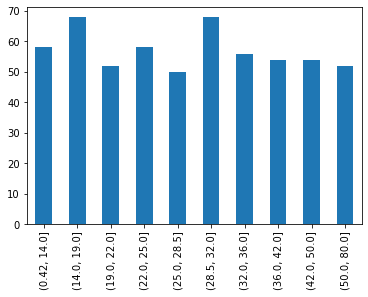

In [63]:
output['age_labels'].value_counts().sort_index().plot(kind = 'bar')

In [65]:
output['fare_labels'].value_counts().sort_index()

(0.0, 7.75]          58
(7.75, 7.896]        51
(7.896, 9.225]       57
(9.225, 13.0]        84
(13.0, 15.75]        30
(15.75, 26.0]        77
(26.0, 29.125]       40
(29.125, 51.479]     54
(51.479, 82.171]     57
(82.171, 512.329]    57
Name: fare_labels, dtype: int64

In [67]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,2.0,20.5250,0.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,1.0,14.4542,0.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,2.0,16.1000,0.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,2.0,7.7750,0.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,1.0,13.0000,0.0,"(22.0, 25.0]","(9.225, 13.0]"
...,...,...,...,...,...,...
92,46.0,3.0,61.1750,1.0,"(42.0, 50.0]","(51.479, 82.171]"
134,25.0,1.0,13.0000,0.0,"(22.0, 25.0]","(9.225, 13.0]"
337,41.0,3.0,134.5000,2.0,"(36.0, 42.0]","(82.171, 512.329]"
548,33.0,2.0,20.5250,0.0,"(32.0, 36.0]","(15.75, 26.0]"


In [71]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [72]:
accuracy_score(y_test, y_pred2)

0.6223776223776224

In [73]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10, scoring = 'accuracy'))

0.6275234741784037

In [74]:
import matplotlib.pyplot as plt

In [85]:
# Create Function 

def discretize(bins, strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbins_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age,[0]),
        ('second', kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title("After")


0.6344679186228481


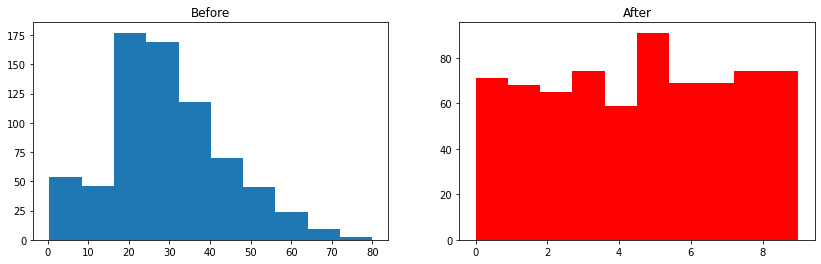

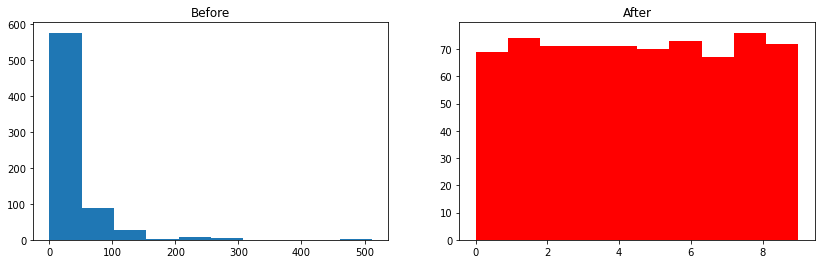

In [86]:
discretize(20,'quantile')

0.6358763693270735


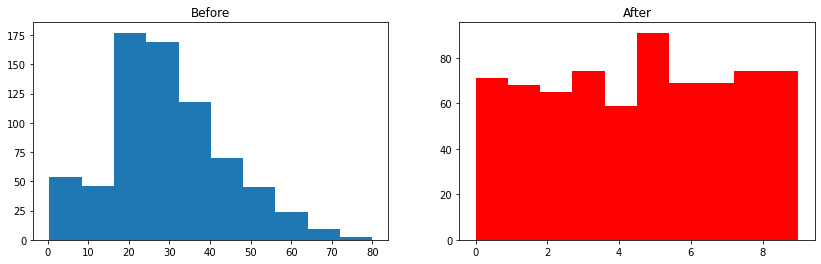

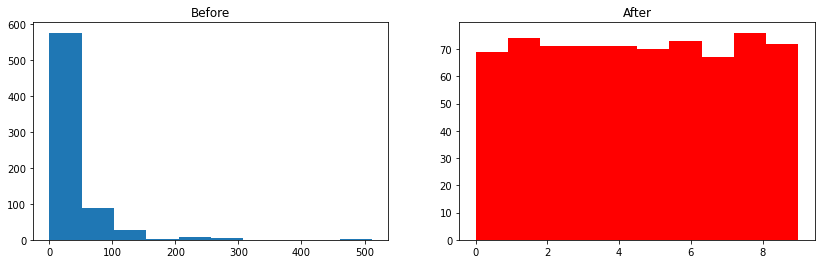

In [87]:
discretize(20,'kmeans')